<a href="https://colab.research.google.com/github/PorasS/AI/blob/master/kerasIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to tensorflow and keras**


In [ ]:
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.3.0


**Using tensorflow directly**

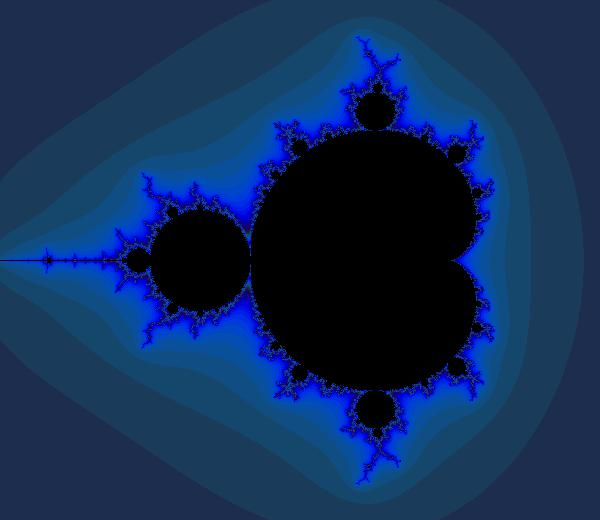

In [ ]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))



# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
for i in range(200):
    # Compute the new values of z: z^2 + x
    zs_ = zs*zs + xs

    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4

    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    
DisplayFractal(ns.numpy())


In [ ]:
#Matrix multiplication in tensorflow
import tensorflow as tf

#3x3
matrix1= tf.constant([[3.,3.]])

#2x1 matrix
matrix2= tf.constant([[2.],[2.]])

#matrix multiplication
product = tf.matmul(matrix1,matrix2)

print(product)
print(float(product))


tf.Tensor([[12.]], shape=(1, 1), dtype=float32)
12.0


In [ ]:
import tensorflow as tf

x = tf.Variable([1.0,2.0])
a = tf.constant([3.0,3.0])

sub = tf.subtract(x,a)
print(sub)
print(sub.numpy())

tf.Tensor([-2. -1.], shape=(2,), dtype=float32)
[-2. -1.]


In [ ]:
x.assign([4.0,6.0])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([4., 6.], dtype=float32)>

In [ ]:
sub = tf.subtract(x,a)
print(sub)
print(sub.numpy())

tf.Tensor([1. 3.], shape=(2,), dtype=float32)
[1. 3.]


**Introduction to Keras**
Keras is a layer on top of tensorflow, that makes it much easier to make neural networks.

Lets see mpg model with keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io 
import os
import requests
import numpy as np
from sklearn import metrics

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

display(df[0:5])
display(df['horsepower'].isnull().values.any())

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


True

In [ ]:
cars = df['name']

#handle missing values
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

#pandas to numpy
x = df[['cylinders','displacement','horsepower','weight','acceleration','year','origin']].values
y = df['mpg'].values #regression

#Build the neural network
#x.shape[1] is no of columns we have, x.shape[0] is for no of rows
# relu (rectified linear unit)
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) #Hidden 1
model.add(Dense(10, activation= 'relu')) #Hidden 2
model.add(Dense(1)) #Output
model.compile(loss="mean_squared_error", optimizer = "adam")

#verbose=0, no progress
#verbose=1, Display progress bar, does not  work well with jupyter
#verbose=2, Summary progress out (use with jupyter is you want to check the loss at each epoch)
model.fit(x,y,verbose=2,epochs=100)


Epoch 1/100
13/13 - 0s - loss: 12621.4834
Epoch 2/100
13/13 - 0s - loss: 888.4970
Epoch 3/100
13/13 - 0s - loss: 906.5664
Epoch 4/100
13/13 - 0s - loss: 541.1721
Epoch 5/100
13/13 - 0s - loss: 482.3184
Epoch 6/100
13/13 - 0s - loss: 456.9390
Epoch 7/100
13/13 - 0s - loss: 441.4828
Epoch 8/100
13/13 - 0s - loss: 431.7177
Epoch 9/100
13/13 - 0s - loss: 426.1723
Epoch 10/100
13/13 - 0s - loss: 419.3374
Epoch 11/100
13/13 - 0s - loss: 407.8946
Epoch 12/100
13/13 - 0s - loss: 398.8240
Epoch 13/100
13/13 - 0s - loss: 388.7419
Epoch 14/100
13/13 - 0s - loss: 382.3507
Epoch 15/100
13/13 - 0s - loss: 370.9897
Epoch 16/100
13/13 - 0s - loss: 362.1509
Epoch 17/100
13/13 - 0s - loss: 352.9160
Epoch 18/100
13/13 - 0s - loss: 343.4314
Epoch 19/100
13/13 - 0s - loss: 334.6024
Epoch 20/100
13/13 - 0s - loss: 324.3925
Epoch 21/100
13/13 - 0s - loss: 314.6441
Epoch 22/100
13/13 - 0s - loss: 306.4918
Epoch 23/100
13/13 - 0s - loss: 296.7122
Epoch 24/100
13/13 - 0s - loss: 288.5957
Epoch 25/100
13/13 - 0s

In [ ]:
#Lets predict with the model
pred = model.predict(x)
print("Shape:{}".format(pred.shape))
print(pred)

Shape:(398, 1)
[[14.793416 ]
 [14.043078 ]
 [14.940078 ]
 [16.229836 ]
 [15.231225 ]
 [10.655721 ]
 [10.025864 ]
 [10.465955 ]
 [10.657987 ]
 [11.994918 ]
 [11.527614 ]
 [13.171233 ]
 [ 9.046194 ]
 [ 9.838915 ]
 [27.024357 ]
 [20.651392 ]
 [20.674726 ]
 [19.895866 ]
 [27.350817 ]
 [25.948933 ]
 [27.176357 ]
 [26.41018  ]
 [27.91358  ]
 [26.127586 ]
 [19.982248 ]
 [17.959496 ]
 [20.804924 ]
 [20.19011  ]
 [21.963388 ]
 [27.631845 ]
 [24.109152 ]
 [26.879337 ]
 [28.242798 ]
 [17.968634 ]
 [20.101656 ]
 [18.0125   ]
 [17.230679 ]
 [19.21358  ]
 [14.808699 ]
 [12.027529 ]
 [14.448573 ]
 [16.300695 ]
 [13.804744 ]
 [12.050089 ]
 [12.60999  ]
 [17.204914 ]
 [24.232075 ]
 [17.814777 ]
 [16.793022 ]
 [24.546362 ]
 [25.721384 ]
 [28.79496  ]
 [26.86935  ]
 [29.238476 ]
 [28.989647 ]
 [26.615303 ]
 [27.672167 ]
 [27.69789  ]
 [27.06999  ]
 [28.29131  ]
 [25.830038 ]
 [25.675928 ]
 [15.129521 ]
 [12.429233 ]
 [16.774574 ]
 [14.545317 ]
 [16.769152 ]
 [12.372105 ]
 [15.1381235]
 [15.428854 ]
 [13.

In [ ]:
# Measure RMSE error. RMSE is common for regression
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 4.685817623657029


This means that, on average the prediction were within +/- 5.89 values of the correct value.

We can also print out the first 10 cars, with predictions and actual mpg

In [ ]:
# Sample predictions
for i in range(10):
  print(f"{i+1}. Car Name: {cars[i]}, MPG: {y[i]}, predicted MPG: {pred[i]}")

1. Car Name: chevrolet chevelle malibu, MPG: 18.0, predicted MPG: [14.793416]
2. Car Name: buick skylark 320, MPG: 15.0, predicted MPG: [14.043078]
3. Car Name: plymouth satellite, MPG: 18.0, predicted MPG: [14.940078]
4. Car Name: amc rebel sst, MPG: 16.0, predicted MPG: [16.229836]
5. Car Name: ford torino, MPG: 17.0, predicted MPG: [15.231225]
6. Car Name: ford galaxie 500, MPG: 15.0, predicted MPG: [10.655721]
7. Car Name: chevrolet impala, MPG: 14.0, predicted MPG: [10.025864]
8. Car Name: plymouth fury iii, MPG: 14.0, predicted MPG: [10.465955]
9. Car Name: pontiac catalina, MPG: 14.0, predicted MPG: [10.657987]
10. Car Name: amc ambassador dpl, MPG: 15.0, predicted MPG: [11.994918]


**Simple tensorflow classification**

In [ ]:
import os
import pandas as pd
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv", na_values=['NA', '?'])

display(df[0:5])

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Convert to numpy calssification
x = df[['sepal_l','sepal_w','petal_l','petal_w']].values
dummies = pd.get_dummies(df['species']) # Classification
species = dummies.columns
y = dummies.values


# Build Neural Network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # output

model.compile(loss='categorical_crossentropy', optimizer = 'adam')
model.fit(x,y, verbose=2, epochs=100)


Epoch 1/100
5/5 - 0s - loss: 1.1223
Epoch 2/100
5/5 - 0s - loss: 1.0566
Epoch 3/100
5/5 - 0s - loss: 1.0042
Epoch 4/100
5/5 - 0s - loss: 0.9557
Epoch 5/100
5/5 - 0s - loss: 0.9146
Epoch 6/100
5/5 - 0s - loss: 0.8687
Epoch 7/100
5/5 - 0s - loss: 0.8274
Epoch 8/100
5/5 - 0s - loss: 0.7895
Epoch 9/100
5/5 - 0s - loss: 0.7485
Epoch 10/100
5/5 - 0s - loss: 0.7109
Epoch 11/100
5/5 - 0s - loss: 0.6739
Epoch 12/100
5/5 - 0s - loss: 0.6397
Epoch 13/100
5/5 - 0s - loss: 0.6069
Epoch 14/100
5/5 - 0s - loss: 0.5780
Epoch 15/100
5/5 - 0s - loss: 0.5522
Epoch 16/100
5/5 - 0s - loss: 0.5286
Epoch 17/100
5/5 - 0s - loss: 0.5072
Epoch 18/100
5/5 - 0s - loss: 0.4889
Epoch 19/100
5/5 - 0s - loss: 0.4718
Epoch 20/100
5/5 - 0s - loss: 0.4599
Epoch 21/100
5/5 - 0s - loss: 0.4434
Epoch 22/100
5/5 - 0s - loss: 0.4293
Epoch 23/100
5/5 - 0s - loss: 0.4169
Epoch 24/100
5/5 - 0s - loss: 0.4056
Epoch 25/100
5/5 - 0s - loss: 0.3966
Epoch 26/100
5/5 - 0s - loss: 0.3848
Epoch 27/100
5/5 - 0s - loss: 0.3763
Epoch 28/1

In [ ]:
# print out the no of species found
print(species)

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


In [ ]:
pred =  model.predict(x)
print("Shape: {pred.shape}")
print(pred)

Shape: {pred.shape}
[[9.99485016e-01 5.14927611e-04 6.32588160e-09]
 [9.97497618e-01 2.50228192e-03 7.43167448e-08]
 [9.99032021e-01 9.67948290e-04 2.65880047e-08]
 [9.97573435e-01 2.42649950e-03 9.95063374e-08]
 [9.99626279e-01 3.73722403e-04 4.58443239e-09]
 [9.99481022e-01 5.19011461e-04 4.71898032e-09]
 [9.99186814e-01 8.13152001e-04 2.52665870e-08]
 [9.99058902e-01 9.41151928e-04 1.60023195e-08]
 [9.96645033e-01 3.35468119e-03 2.11148830e-07]
 [9.97954130e-01 2.04584841e-03 4.82400679e-08]
 [9.99628544e-01 3.71478061e-04 2.62276556e-09]
 [9.98730600e-01 1.26935053e-03 2.98678664e-08]
 [9.97940600e-01 2.05942267e-03 5.79382196e-08]
 [9.99158621e-01 8.41423171e-04 3.54470302e-08]
 [9.99934316e-01 6.56901466e-05 1.55313734e-10]
 [9.99938488e-01 6.15158278e-05 1.76626130e-10]
 [9.99834538e-01 1.65493489e-04 1.12281051e-09]
 [9.99381304e-01 6.18711696e-04 9.08659903e-09]
 [9.99395132e-01 6.04913745e-04 3.59096242e-09]
 [9.99681115e-01 3.18900042e-04 3.44870843e-09]
 [9.98203397e-01 1.7

Biggest one is consoidered as classified. If you would like to turn of the scentific notation, the following line can.

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
print(y[0:10])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [ ]:
predict_classes = np.argmax(pred,axis=1)
excepted_classes = np.argmax(y,axis=1)
print(f"Predictions: {predict_classes}")
print(f"Excepted: {excepted_classes}")

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Excepted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


we can also print out the actual name of the classes

In [ ]:
print(species[predict_classes[1:10])

Index(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'],
      dtype='object')


In [ ]:
from sklearn.metrics import accuracy_score

correct = accuracy_score(excepted_classes, predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.9733333333333334


In [ ]:
# Prediction by passing the values, also called adhoc prediction
sample_flower = np.array([[5.0,3.0,4.0,2.0]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred)
print(f"After argmax pred: {pred}")
print(f"Predict that {sample_flower} is: {species[pred]}")


[[0.00171089 0.3733349  0.6249542 ]]
After argmax pred: 2
Predict that [[5. 3. 4. 2.]] is: Iris-virginica


In [ ]:
# Predicts two sample flowers
sample_flowers = np.array([[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]], dtype=float)
pred = model.predict(sample_flowers)
print(pred)
pred = np.argmax(pred,axis=1)
print(f"After argmax pred: {pred}")
print(f"Predict that {sample_flowers} is: {species[pred]}")

[[0.00171089 0.37333485 0.6249543 ]
 [0.99766266 0.00233717 0.00000008]]
After argmax pred: [2 0]
Predict that [[5.  3.  4.  2. ]
 [5.2 3.5 1.5 0.8]] is: Index(['Iris-virginica', 'Iris-setosa'], dtype='object')


**Saving and loading keras neural network**
Complex neural network will take a long time to train/fit, it is helpful to save these neural networks so that they can be reloaded later. A reloaded neural network will not required training. Keras provides three format for neural network saving.
>YAML
>JSON
>HDF5

usually you will want to save in HDF5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

save_path = "/content/sample_data"
df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas as Numpy
x = df[['cylinders','displacement','horsepower','weight','acceleration','year','origin']].values
y = df['mpg'].values # regression

# Build the network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # output
model.compile(loss = 'mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

# Predict
pred = model.predict(x)

# Measure RMSE error. RMSE is common for  regression
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Before save score (RMSE): {score}")

# save neural network model to JSON (no weights)
model_json = model.to_json()
with open(os.path.join(save_path,"network.json"), "w") as json_file:
  json_file.write(model_json)


# save neural network model to YAML (no weights)
model_yaml = model.to_yaml()
with open(os.path.join(save_path,"network.yaml"), "w") as yaml_file:
  yaml_file.write(model_yaml)

# save entire network to HDF5 (save everything suggested)
model.save(os.path.join(save_path,"network.h5"))

Epoch 1/100
13/13 - 0s - loss: 432862.8438
Epoch 2/100
13/13 - 0s - loss: 89245.5859
Epoch 3/100
13/13 - 0s - loss: 11885.8906
Epoch 4/100
13/13 - 0s - loss: 524.5509
Epoch 5/100
13/13 - 0s - loss: 537.1743
Epoch 6/100
13/13 - 0s - loss: 391.7661
Epoch 7/100
13/13 - 0s - loss: 120.4809
Epoch 8/100
13/13 - 0s - loss: 97.7947
Epoch 9/100
13/13 - 0s - loss: 97.8201
Epoch 10/100
13/13 - 0s - loss: 93.6162
Epoch 11/100
13/13 - 0s - loss: 93.0865
Epoch 12/100
13/13 - 0s - loss: 92.4945
Epoch 13/100
13/13 - 0s - loss: 92.3102
Epoch 14/100
13/13 - 0s - loss: 92.1601
Epoch 15/100
13/13 - 0s - loss: 92.0598
Epoch 16/100
13/13 - 0s - loss: 91.9852
Epoch 17/100
13/13 - 0s - loss: 91.7845
Epoch 18/100
13/13 - 0s - loss: 91.6422
Epoch 19/100
13/13 - 0s - loss: 91.2977
Epoch 20/100
13/13 - 0s - loss: 91.2197
Epoch 21/100
13/13 - 0s - loss: 91.1344
Epoch 22/100
13/13 - 0s - loss: 90.8767
Epoch 23/100
13/13 - 0s - loss: 90.5898
Epoch 24/100
13/13 - 0s - loss: 90.5022
Epoch 25/100
13/13 - 0s - loss: 90.

Now we reload the network and perform another prediction. The RMSE sould match the previous one exactly is the neural network was really saved and reloaded.



In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model(os.path.join(save_path,"network.h5"))
pred = model2.predict(x)
# measure RMSE error. RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"After load score (RMSE): {score}")

After load score (RMSE): 8.484526573737398


**Early stopping in Keras to prevent overfitting**

For the divide the dataset into training and validation set, generally we keep 80% for training and 20% for validation.



In [ ]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/iris.csv", na_values=['NA', '?'])

# Convert to numpy - classification
x=df[['sepal_l','sepal_w','petal_l','petal_w']].values
dummies = pd.get_dummies(df['species']) # classification
species = dummies.columns
y = dummies.values

# Split into validation and training set
x_train,x_test, y_train,y_test= train_test_split(x,y, test_size = 0.25, random_state = 42)

# Build neural network
model =  Sequential()
model.add(Dense(50, input_dim=x.shape[1],activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss',min_delta=1e-3, patience=5,verbose=1, mode='auto',restore_best_weights=True)
model.fit(x_train,y_train, validation_data = (x_test,y_test), callbacks=[monitor], verbose=2, epochs=1000)




Epoch 1/1000
4/4 - 0s - loss: 1.4397 - val_loss: 1.2367
Epoch 2/1000
4/4 - 0s - loss: 1.2896 - val_loss: 1.1330
Epoch 3/1000
4/4 - 0s - loss: 1.1743 - val_loss: 1.0474
Epoch 4/1000
4/4 - 0s - loss: 1.0904 - val_loss: 0.9952
Epoch 5/1000
4/4 - 0s - loss: 1.0254 - val_loss: 0.9468
Epoch 6/1000
4/4 - 0s - loss: 0.9672 - val_loss: 0.9050
Epoch 7/1000
4/4 - 0s - loss: 0.9197 - val_loss: 0.8711
Epoch 8/1000
4/4 - 0s - loss: 0.8854 - val_loss: 0.8378
Epoch 9/1000
4/4 - 0s - loss: 0.8439 - val_loss: 0.8011
Epoch 10/1000
4/4 - 0s - loss: 0.8078 - val_loss: 0.7704
Epoch 11/1000
4/4 - 0s - loss: 0.7765 - val_loss: 0.7408
Epoch 12/1000
4/4 - 0s - loss: 0.7439 - val_loss: 0.7121
Epoch 13/1000
4/4 - 0s - loss: 0.7156 - val_loss: 0.6803
Epoch 14/1000
4/4 - 0s - loss: 0.6826 - val_loss: 0.6438
Epoch 15/1000
4/4 - 0s - loss: 0.6496 - val_loss: 0.6092
Epoch 16/1000
4/4 - 0s - loss: 0.6202 - val_loss: 0.5798
Epoch 17/1000
4/4 - 0s - loss: 0.5919 - val_loss: 0.5515
Epoch 18/1000
4/4 - 0s - loss: 0.5643 - 

Lets find the accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_test)
display(pred)
predict_classes = np.argmax(pred,axis=1)
display(predict_classes)
expected_classes = np.argmax(y_test,axis=1)
correct = accuracy_score(expected_classes, predict_classes)
print(f"Accuracy: {correct}")


array([[5.7823895e-03, 8.9392495e-01, 1.0029259e-01],
       [9.9203134e-01, 7.9616224e-03, 7.1088166e-06],
       [2.7892147e-06, 1.0698487e-03, 9.9892730e-01],
       [8.0848774e-03, 8.4978193e-01, 1.4213316e-01],
       [5.2781091e-03, 9.4439751e-01, 5.0324351e-02],
       [9.8946172e-01, 1.0523994e-02, 1.4247887e-05],
       [4.1217320e-02, 9.4994187e-01, 8.8408170e-03],
       [1.4887433e-03, 2.1493025e-01, 7.8358102e-01],
       [4.5105633e-03, 5.6193733e-01, 4.3355206e-01],
       [1.8126762e-02, 9.6855372e-01, 1.3319487e-02],
       [1.9680467e-03, 2.9847282e-01, 6.9955915e-01],
       [9.8472637e-01, 1.5236213e-02, 3.7410227e-05],
       [9.9546510e-01, 4.5299423e-03, 4.9533828e-06],
       [9.8359030e-01, 1.6373655e-02, 3.6041853e-05],
       [9.9190372e-01, 8.0842981e-03, 1.1977205e-05],
       [7.6545775e-03, 9.1860539e-01, 7.3740020e-02],
       [2.9059762e-05, 5.0493600e-03, 9.9492162e-01],
       [1.4405219e-02, 9.6479422e-01, 2.0800607e-02],
       [7.2719748e-03, 8.078

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

Accuracy: 1.0


**Early Stopping with regression**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Split into validation and training sets
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(x_train,y_train,validation_data=(x_test,y_test),
        callbacks=[monitor], verbose=2,epochs=1000)


Epoch 1/1000
10/10 - 0s - loss: 231613.0156 - val_loss: 127209.4531
Epoch 2/1000
10/10 - 0s - loss: 86646.6719 - val_loss: 36668.8008
Epoch 3/1000
10/10 - 0s - loss: 21600.1602 - val_loss: 5971.6592
Epoch 4/1000
10/10 - 0s - loss: 3218.9382 - val_loss: 1800.3075
Epoch 5/1000
10/10 - 0s - loss: 1775.3948 - val_loss: 2575.7092
Epoch 6/1000
10/10 - 0s - loss: 2128.1880 - val_loss: 2445.1497
Epoch 7/1000
10/10 - 0s - loss: 1794.0801 - val_loss: 1971.4465
Epoch 8/1000
10/10 - 0s - loss: 1476.7157 - val_loss: 1686.4865
Epoch 9/1000
10/10 - 0s - loss: 1383.1962 - val_loss: 1613.4393
Epoch 10/1000
10/10 - 0s - loss: 1364.3843 - val_loss: 1585.1436
Epoch 11/1000
10/10 - 0s - loss: 1345.7542 - val_loss: 1560.3682
Epoch 12/1000
10/10 - 0s - loss: 1318.4625 - val_loss: 1539.2306
Epoch 13/1000
10/10 - 0s - loss: 1298.6498 - val_loss: 1515.7964
Epoch 14/1000
10/10 - 0s - loss: 1273.4081 - val_loss: 1472.8169
Epoch 15/1000
10/10 - 0s - loss: 1237.9231 - val_loss: 1416.1442
Epoch 16/1000
10/10 - 0s - 

In [ ]:
# Measure RMSE error, RMSE error is common for regression
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print(f"Score (RMSE): {score}")

Score (RMSE): 4.062550190776538


**Extracting Keras Weights and Manual neural network calculation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
# Create a dataset for the XOR function
x = np.array([
             [0,0],
             [0,1],
             [1,0],
             [1,1]])

y = np.array([0,1,1,0])

# Build the network
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu')) 
model.add(Dense(1)) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=0,epochs=10000)

#Pred
pred =  model.predict(x)
print(pred)

[[2.9802322e-08]
 [1.0000000e+00]
 [9.9999994e-01]
 [2.9802322e-08]]


In [ ]:
# Dump Weights
for layerNum, layer in enumerate(model.layers):
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]

  for toNeuronNum, bias in enumerate(biases):
    print(f"{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}")

  for fromNeuronNum, wgt in enumerate(weights):
    for toNeuronNum, wgt2 in enumerate(wgt):
      print(f"L{layerNum}N{fromNeuronNum} -> L{layerNum+1}N{toNeuronNum} = {wgt2}")

0B -> L1N0: -8.265034878718325e-09
0B -> L1N1: 9.35364141696482e-09
L0N0 -> L1N0 = -0.8778201937675476
L0N0 -> L1N1 = 1.6086407899856567
L0N1 -> L1N0 = 0.8778201937675476
L0N1 -> L1N1 = -1.6086407899856567
1B -> L2N0: 2.3987698938299218e-08
L1N0 -> L2N0 = 1.1391854286193848
L1N1 -> L2N0 = 0.6216427683830261


**Encoding a feature vector for keras neural network**

In [7]:
import pandas as pd

df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",na_values=['NA','?'])
display(df[0:5])

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a


we have categorical data like job, area, lets convert it into dummy variables, and into a original dataset

In [8]:
dummies=pd.get_dummies(df['job'], prefix="job")
print(dummies.shape)
display(dummies[0:5])

(2000, 33)


,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df = pd.concat([df,dummies],axis=1)
df.drop('job', axis=1, inplace=True)
display(df[0:10])

,id,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz
0,1,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,4,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,c,70854.0,40.400000,1,14.893343,87,20.340593,43,0.866142,0.673228,0.473581,d,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,d,38726.0,30.975000,3,3.822477,33,9.480399,39,0.976378,0.874016,0.092151,f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,a,55162.0,26.966667,2,4.312097,17,29.219896,44,1.000000,0.724409,0.162833,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,9,c,67311.0,32.383333,0,25.093772,169,10.927357,45,0.952756,0.681102,0.096333,c,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,a,63344.0,38.233333,1,2.816034,3,21.915695,42,0.897638,0.724409,0.173986,c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


**We also need dummy variables for area column**

In [10]:
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area',axis=1,inplace=True)
display(df[0:10])

,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product,job_11,job_al,job_am,job_ax,job_bf,job_by,job_cv,job_de,job_dz,job_e2,job_f8,job_gj,job_gv,job_kd,job_ke,job_kl,job_kp,job_ks,job_kw,job_mm,job_nb,job_nn,job_ob,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz,area_a,area_b,area_c,area_d
0,1,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,6,70854.0,40.400000,1,14.893343,87,20.340593,43,0.866142,0.673228,0.473581,d,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,7,38726.0,30.975000,3,3.822477,33,9.480399,39,0.976378,0.874016,0.092151,f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,8,55162.0,26.966667,2,4.312097,17,29.219896,44,1.000000,0.724409,0.162833,b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,9,67311.0,32.383333,0,25.093772,169,10.927357,45,0.952756,0.681102,0.096333,c,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,10,63344.0,38.233333,1,2.816034,3,21.915695,42,0.897638,0.724409,0.173986,c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
#find missing values
print(df['income'].isnull().values.any())

True


In [14]:
med = df['income'].median()
df['income'] = df['income'].fillna(med)

In [15]:
print(list(df.columns))

['id', 'income', 'aspect', 'subscriptions', 'dist_healthy', 'save_rate', 'dist_unhealthy', 'age', 'pop_dense', 'retail_dense', 'crime', 'product', 'job_11', 'job_al', 'job_am', 'job_ax', 'job_bf', 'job_by', 'job_cv', 'job_de', 'job_dz', 'job_e2', 'job_f8', 'job_gj', 'job_gv', 'job_kd', 'job_ke', 'job_kl', 'job_kp', 'job_ks', 'job_kw', 'job_mm', 'job_nb', 'job_nn', 'job_ob', 'job_pe', 'job_po', 'job_pq', 'job_pz', 'job_qp', 'job_qw', 'job_rn', 'job_sa', 'job_vv', 'job_zz', 'area_a', 'area_b', 'area_c', 'area_d']


In [16]:
x_columns = df.columns.drop('product').drop('id')
print(list(x_columns))

['income', 'aspect', 'subscriptions', 'dist_healthy', 'save_rate', 'dist_unhealthy', 'age', 'pop_dense', 'retail_dense', 'crime', 'job_11', 'job_al', 'job_am', 'job_ax', 'job_bf', 'job_by', 'job_cv', 'job_de', 'job_dz', 'job_e2', 'job_f8', 'job_gj', 'job_gv', 'job_kd', 'job_ke', 'job_kl', 'job_kp', 'job_ks', 'job_kw', 'job_mm', 'job_nb', 'job_nn', 'job_ob', 'job_pe', 'job_po', 'job_pq', 'job_pz', 'job_qp', 'job_qw', 'job_rn', 'job_sa', 'job_vv', 'job_zz', 'area_a', 'area_b', 'area_c', 'area_d']


**Generate X and Y for a Classification Neural Network**

In [17]:
# Convert to Numpy Classification
x_columns = df.columns.drop('product').drop('id')
x = df[x_columns].values
dummies = pd.get_dummies(df['product']) # classification
products = dummies.columns
y = dummies.values

In [18]:
print(x)
print(y)

[[5.08760000e+04 1.31000000e+01 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [6.03690000e+04 1.86250000e+01 2.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [5.51260000e+04 3.47666667e+01 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [2.85950000e+04 3.94250000e+01 3.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.79490000e+04 5.73333333e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [6.14670000e+04 1.68916667e+01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]
[[0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


>Classification neural network have an output neuron count equal to no of classes.
>Classification neural network should use **categorical_crossentropy** and a **softmax** activation function on the output layer.

**Generate X and Y for regression neural network**

In [ ]:
# if we have missing values in target columns, its better to drop these rows, 
# we won't want to train the neural network on median values.
y = df['income'].values